## Code Reference

https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

## Transforms

? 

In [22]:
import torch 
import numpy as np
from torchvision import datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [23]:
training_dataset = datasets.CIFAR10(root = '.data_CIFAR10',
                                   train = True,
                                   download = True,
                                   transform = T.ToTensor(),
                                   target_transform = T.Lambda(lambda y: torch.zeros(10, dtype = torch.float).scatter(0, torch.tensor(y), value = 1))
                                   )

Files already downloaded and verified


<function matplotlib.pyplot.show(*args, **kw)>

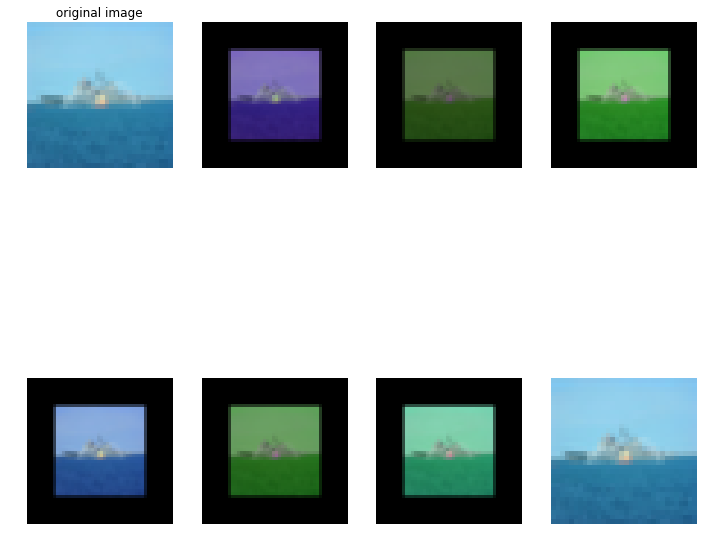

In [55]:
sample_idx = torch.randint(0, len(training_dataset), size = (1,)).item()
img, label = training_dataset[sample_idx]

padding_transform = T.Pad(10)
resize_transform = T.Resize(size = 50)
color_transform = T.ColorJitter(brightness = .5, hue = .3)
##applier applies all 4 filters on an imgae with a probability p
transform = T.RandomApply(transforms=[padding_transform, resize_transform, color_transform], p = 0.5)

##applies random augmentations (compare with above)
#transform = T.RandAugment()

transformed_imgs = [transform(img) for _ in range(8)]

img = torch.from_numpy(np.transpose(img.numpy(), (1,2,0)))
transformed_imgs = [torch.from_numpy(np.transpose(transformed_imgs[_].numpy(), (1,2,0))) for _ in range(8)]

figure = plt.figure(figsize = (12,12))
cols, rows = 4, 2
figure.add_subplot(rows, cols, 1)
plt.title("original image")
plt.axis('off')
plt.imshow(img)

for i in range(1,8):
    figure.add_subplot(rows, cols, i+1)
    #print(padded_img.shape)
    #plt.title("padded image")
    plt.axis('off')
    plt.imshow(transformed_imgs[i])

plt.show

## Model Building